<a href="https://colab.research.google.com/github/jordanoid/Rock-Paper-Scissor-Image-Classification/blob/main/RPS_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Diri**

---
Nama : Jordano Iqbal Darmawan<br>
Username : jordanoid<br>
Email : jordanoid2@gmail.com


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-11 04:38:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.67MB/s    in 38s     

2021-07-11 04:39:36 (8.00 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import os, zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()
os.remove("/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt")

In [ ]:
os.listdir("/tmp/rockpaperscissors/rps-cv-images/")
data_dir = os.path.join("/tmp/rockpaperscissors/", "rps-cv-images")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 30,
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  fill_mode = "nearest",
                  horizontal_flip = True,
                  zoom_range = 0.2,
                  shear_range = 0.2,
                  validation_split = 0.4)

val_datagen = ImageDataGenerator(
                rescale = 1./255,
                validation_split = 0.4)

In [ ]:
train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size = (150, 150),
    batch_size = 64,
    subset = "training",
    class_mode = "categorical",
    seed = 42)

val_ds = val_datagen.flow_from_directory(
    data_dir,
    target_size = (150, 150),
    batch_size = 64,
    subset = "validation",
    class_mode = "categorical",
    seed = 42)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
model.fit(
    train_ds,
    epochs = 30,
    validation_data = val_ds,
    verbose = 1
)

Epoch 1/30
21/21 [==============================] - 16s 552ms/step - loss: 1.2899 - accuracy: 0.3288 - val_loss: 1.0853 - val_accuracy: 0.7449
Epoch 2/30
21/21 [==============================] - 11s 511ms/step - loss: 1.1058 - accuracy: 0.4102 - val_loss: 1.2378 - val_accuracy: 0.3284
Epoch 3/30
21/21 [==============================] - 11s 513ms/step - loss: 1.0482 - accuracy: 0.5426 - val_loss: 0.7301 - val_accuracy: 0.8707
Epoch 4/30
21/21 [==============================] - 11s 513ms/step - loss: 0.8236 - accuracy: 0.6811 - val_loss: 0.4234 - val_accuracy: 0.8776
Epoch 5/30
21/21 [==============================] - 11s 512ms/step - loss: 0.6490 - accuracy: 0.7374 - val_loss: 0.2872 - val_accuracy: 0.9222
Epoch 6/30
21/21 [==============================] - 11s 510ms/step - loss: 0.5566 - accuracy: 0.7732 - val_loss: 0.2816 - val_accuracy: 0.9394
Epoch 7/30
21/21 [==============================] - 11s 516ms/step - loss: 0.4848 - accuracy: 0.8105 - val_loss: 0.2057 - val_accuracy: 0.9531

Saving gunting5.jpeg to gunting5 (1).jpeg
Gunting


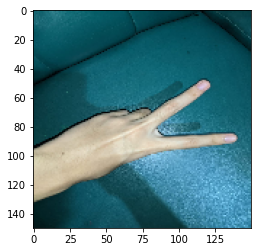

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0][0] == 1:
    print("Kertas")
  elif classes[0][1] == 1:
    print("Batu")
  elif classes[0][2] == 1:
    print("Gunting")
  else: 
    print("Gagal memprediksi")